# Load and preprocess data

In [3]:
%run data_cleaning.ipynb

c:\Users\jorst\Documents\STUDIER\Master Courses\Research Project (732A76)\rp_venv\Lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
c:\Users\jorst\Documents\STUDIER\Master Courses\Research Project (732A76)\rp_venv\Lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
C:\Users\jorst\AppData\Local\Temp\ipykernel_9232\3679301974.py:2: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  siginfo = pd.read_csv("Data/siginfo_beta.txt", sep="\t")
C:\Users\jorst\AppD

# Dependencies

In [48]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

import matplotlib.pyplot as plt

# Model Design

In [54]:
# === INPUT =========================
x_in = Input(shape=X_train.shape[1:])
x = x_in
# === Hidden layers =========================
x = Dense(15, activation="relu")(x)
x = Dense(30, activation="relu")(x)
x = Dense(50, activation="relu")(x)
x = Dense(100, activation="relu")(x)
x = Dense(300, activation="relu")(x)
x = Dense(500, activation="relu")(x)
x = Dense(700, activation="relu")(x)
# === OUTPUT =========================
x_out = Dense(978, activation="relu")(x)
# ============================================

model = Model(inputs=x_in, outputs=x_out)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='MeanAbsoluteError', metrics=["mse"], optimizer=sgd)
model.summary(100)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)                │ (None, 13)                      │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_80 (Dense)                           │ (None, 15)                      │               210 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_81 (Dense)                           │ (None, 30)                      │               480 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_82 (Dense)                           │ (None, 50)                      │             1,550 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_83 (Dense)                           │ (None, 100)                     │             5,100 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_84 (Dense)                           │ (None, 300)                     │            30,300 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_85 (Dense)                           │ (None, 500)                     │           150,500 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_86 (Dense)                           │ (None, 700)                     │           350,700 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_87 (Dense)                           │ (None, 978)                     │           685,578 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 1,224,418 (4.67 MB)

 Trainable params: 1,224,418 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [55]:
history = model.fit(X_train,y_train, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.7232 - mse: 1.1810 - val_loss: 0.7053 - val_mse: 1.1295
Epoch 2/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7122 - mse: 1.1821 - val_loss: 0.7051 - val_mse: 1.1290
Epoch 3/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7055 - mse: 1.1468 - val_loss: 0.7050 - val_mse: 1.1288
Epoch 4/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7024 - mse: 1.1420 - val_loss: 0.7049 - val_mse: 1.1286
Epoch 5/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7054 - mse: 1.1351 - val_loss: 0.7049 - val_mse: 1.1284
Epoch 6/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7107 - mse: 1.1641 - val_loss: 0.7048 - val_mse: 1.1283
Epoch 7/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7086 - mse: 1.1625 - val_loss: 0.7048 - val_mse: 1.1281
Epoch 8/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7096 - mse: 1.1494 - val_loss: 0.7048 - val_mse: 1.1280
Epoch 9/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms

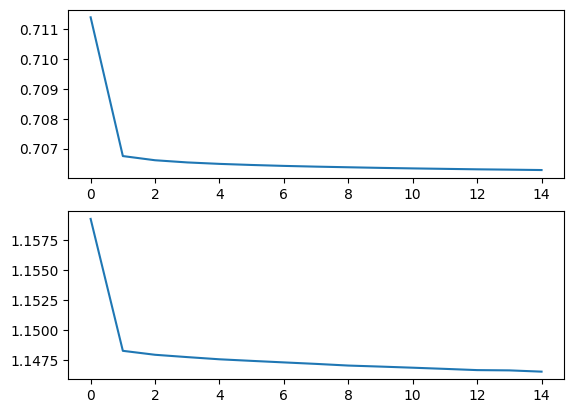

In [56]:
fig, axs = plt.subplots(nrows=2)
axs[0].plot(history.history["loss"])

axs[1].plot(history.history["mse"])

#print(history.history)
#model.get_metrics_result()

In [58]:
score = model.evaluate(X_valid, y_valid, verbose=0)

score
#for i in range(len(score)):
#    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

[0.7130488753318787, 1.154198408126831]